# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [140]:
from IPython.lib.display import YouTubeVideo

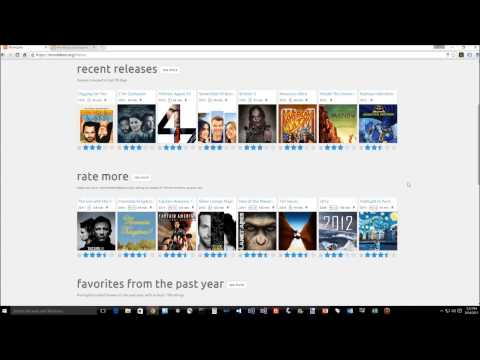

In [141]:
YouTubeVideo('4tW9HY0Q460')

In [142]:
**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1 Yixin Luo
    
    member 2 Dekun Geng
    
    member 3 Haowen Zhu
    
    member 4 Yin Hang
    
    member 5 Weijing Li 

SyntaxError: invalid syntax (<ipython-input-142-cccbe432b1d1>, line 1)

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

In [232]:
import numpy as np
import matplotlib.pylab as py
import pandas as pa
import scipy.stats as st
from statistics import median
np.set_printoptions(precision=2)
%matplotlib inline

# Merge all of the data into a single Pandas DataFrame

unames = ['UserID', 'Gender', 'Age', 'Occupation','Timestamp']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine = 'python')

rnames = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine = 'python')

mnames = ['MovieID', 'Title', 'Genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine = 'python')






In [144]:
users

UserID Gender  Age  Occupation Timestamp
0          1      F    1          10     48067
1          2      M   56          16     70072
2          3      M   25          15     55117
3          4      M   45           7     02460
4          5      M   25          20     55455
5          6      F   50           9     55117
6          7      M   35           1     06810
7          8      M   25          12     11413
8          9      M   25          17     61614
9         10      F   35           1     95370
10        11      F   25           1     04093
11        12      M   25          12     32793
12        13      M   45           1     93304
13        14      M   35           0     60126
14        15      M   25           7     22903
15        16      F   35           0     20670
16        17      M   50           1     95350
17        18      F   18           3     95825
18        19      M    1          10     48073
19        20      M   25          14     55113
20        21      M   18          16     99353
21        22      M   18          15     53706
22        23      M   35           0     90049
23        24      F   25           7     10023
24        25      M   18           4     01609
25        26      M   25           7     23112
26        27      M   25          11     19130
27        28      F   25           1     14607
28        29      M   35           7     33407
29        30      F   35           7     19143
...      ...    ...  ...         ...       ...
6010    6011      M   35          15     80538
6011    6012      M   35          15     02871
6012    6013      F   25          20     32301
6013    6014      M   45           1     80634
6014    6015      F   25           9     80013
6015    6016      M   45           1     37209
6016    6017      F   35           7     21117
6017    6018      M   35           1     48906
6018    6019      M   25           0     10024
6019    6020      M   50          16     10023
6020    6021      M   25          12     08876
6021    6022      M   25          17     57006
6022    6023      M   25           0     43213
6023    6024      M   25          12     53705
6024    6025      F   25           1     32607
6025    6026      M   35           6     11210
6026    6027      M   18           4     20742
6027    6028      M   18           4     94133
6028    6029      F   25           1     23185
6029    6030      M   25          17     32618
6030    6031      F   18           0     45123
6031    6032      M   45           7     55108
6032    6033      M   50          13     78232
6033    6034      M   25          14     94117
6034    6035      F   25           1     78734
6035    6036      F   25          15     32603
6036    6037      F   45           1     76006
6037    6038      F   56           1     14706
6038    6039      F   45           0     01060
6039    6040      M   25           6     11106

[6040 rows x 5 columns]

In [145]:
ratings

UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
5             1     1197       3  978302268
6             1     1287       5  978302039
7             1     2804       5  978300719
8             1      594       4  978302268
9             1      919       4  978301368
10            1      595       5  978824268
11            1      938       4  978301752
12            1     2398       4  978302281
13            1     2918       4  978302124
14            1     1035       5  978301753
15            1     2791       4  978302188
16            1     2687       3  978824268
17            1     2018       4  978301777
18            1     3105       5  978301713
19            1     2797       4  978302039
20            1     2321       3  978302205
21            1      720       3  978300760
22            1     1270       5  978300055
23            1      527       5  978824195
24            1     2340       3  978300103
25            1       48       5  978824351
26            1     1097       4  978301953
27            1     1721       4  978300055
28            1     1545       4  978824139
29            1      745       3  978824268
...         ...      ...     ...        ...
1000179    6040     2762       4  956704584
1000180    6040     1036       3  956715455
1000181    6040      508       4  956704972
1000182    6040     1041       4  957717678
1000183    6040     3735       4  960971654
1000184    6040     2791       4  956715569
1000185    6040     2794       1  956716438
1000186    6040      527       5  956704219
1000187    6040     2003       1  956716294
1000188    6040      535       4  964828734
1000189    6040     2010       5  957716795
1000190    6040     2011       4  956716113
1000191    6040     3751       4  964828782
1000192    6040     2019       5  956703977
1000193    6040      541       4  956715288
1000194    6040     1077       5  964828799
1000195    6040     1079       2  956715648
1000196    6040      549       4  956704746
1000197    6040     2020       3  956715288
1000198    6040     2021       3  956716374
1000199    6040     2022       5  956716207
1000200    6040     2028       5  956704519
1000201    6040     1080       4  957717322
1000202    6040     1089       4  956704996
1000203    6040     1090       3  956715518
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]

In [146]:
movies

MovieID                                              Title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                       Nixon (1995)   
14         15                            Cutthroat Island (1995)   
15         16                                      Casino (1995)   
16         17                       Sense and Sensibility (1995)   
17         18                                  Four Rooms (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
19         20                                 Money Train (1995)   
20         21                                  Get Shorty (1995)   
21         22                                     Copycat (1995)   
22         23                                   Assassins (1995)   
23         24                                      Powder (1995)   
24         25                           Leaving Las Vegas (1995)   
25         26                                     Othello (1995)   
26         27                                Now and Then (1995)   
27         28                                  Persuasion (1995)   
28         29                  City of Lost Children, The (1995)   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...       ...                                                ...   
3853     3923                           Return of the Fly (1959)   
3854     3924                                Pajama Party (1964)   
3855     3925                      Stranger Than Paradise (1984)   
3856     3926             Voyage to the Bottom of the Sea (1961)   
3857     3927                            Fantastic Voyage (1966)   
3858     3928       Abbott and Costello Meet Frankenstein (1948)   
3859     3929                              Bank Dick, The (1940)   
3860     3930         Creature From the Black Lagoon, The (1954)   
3861     3931                     Giant Gila Monster, The (1959)   
3862     3932                          Invisible Man, The (1933)   
3863     3933                          Killer Shrews, The (1959)   
3864     3934                                      Kronos (1957)   
3865     3935                                      Kronos (1973)   
3866     3936                   Phantom of the Opera, The (1943)   
3867     3937                                     Runaway (1984)   
3868     3938                 Slumber Party Massacre, The (1982)   
3869     3939              Slumber Party Massacre II, The (1987)   
3870     3940             Slumber Party Massacre III, The (1990)   
3871     3941                     Sorority House Massacre (1986)   
3872     3942                  Sorority House Massacre II (1990)   
3873     3943                                  Bamboozled (2000)   
3874     3944                                     Bootmen (2000)   
3875     3945                          Digimon: The Movie (2000)   
3876     3946                                  Get Carter (2000)   
3877     3947                                  Get Carter (1971)   
3878     3948                            Meet the Parents (2000)   
3879     3949                         Requiem for a Dream (200

In [155]:
 merged_inner = pd.merge(left = pd.merge(left = ratings, right= users,left_on='UserID', right_on='UserID' ),right = movies,left_on='MovieID', right_on='MovieID')

In [156]:
merged_inner

UserID  MovieID  Rating  Timestamp_x Gender  Age  Occupation  \
0             1     1193       5    978300760      F    1          10   
1             2     1193       5    978298413      M   56          16   
2            12     1193       4    978220179      M   25          12   
3            15     1193       4    978199279      M   25           7   
4            17     1193       5    978158471      M   50           1   
5            18     1193       4    978156168      F   18           3   
6            19     1193       5    982730936      M    1          10   
7            24     1193       5    978136709      F   25           7   
8            28     1193       3    978125194      F   25           1   
9            33     1193       5    978557765      M   45           3   
10           39     1193       5    978043535      M   18           4   
11           42     1193       3    978038981      M   25           8   
12           44     1193       4    978018995      M   45          17   
13           47     1193       4    977978345      M   18           4   
14           48     1193       4    977975061      M   25           4   
15           49     1193       4    978813972      M   18          12   
16           53     1193       5    977946400      M   25           0   
17           54     1193       5    977944039      M   50           1   
18           58     1193       5    977933866      M   25           2   
19           59     1193       4    977934292      F   50           1   
20           62     1193       4    977968584      F   35           3   
21           80     1193       4    977786172      M   56           1   
22           81     1193       5    977785864      F   25           0   
23           88     1193       5    977694161      F   45           1   
24           89     1193       5    977683596      F   56           9   
25           95     1193       5    977626632      M   45           0   
26           96     1193       3    977621789      F   25          16   
27           99     1193       2    982791053      F    1          10   
28          102     1193       5   1040737607      M   35          19   
29          104     1193       2    977546620      M   25          12   
...         ...      ...     ...          ...    ...  ...         ...   
1000179    4933     3084       3    962757020      M   25          15   
1000180    4802     2218       2   1014866656      M   56           1   
1000181    4812     2308       2    962932391      M   18          14   
1000182    4874      624       4    962781918      F   25           4   
1000183    5059     1434       4    962484364      M   45          16   
1000184    5947     1434       4    957190428      F   45          16   
1000185    5077     1868       3    962417299      M   25           2   
1000186    5944     1868       1    957197520      F   18          10   
1000187    5105      404       3    962337582      M   50           7   
1000188    5185      404       4    963402617      F   35           4   
1000189    5532      404       5    959619841      M   25          17   
1000190    5543      404       3    960127592      M   25          17   
1000191    5220     2543       3    961546137      M   25           7   
1000192    5754     2543       4    958272316      F   18           1   
1000193    5227      591       3    961475931      M   18          10   
1000194    5795      591       1    958145253      M   25           1   
1000195    5313     3656       5    960920392      M   56           0   
1000196    5328     2438       4    960838075      F   25           4   
1000197    5334     3323       3    960796159      F   56          13   
1000198    5334      127       1    960795494      F   56          13   
1000199    5334     3382       5    960796159      F   56          13   
1000200    5420     1843       3    960156505      F    1          19   
1000201    5433      286       3    960240881      F   35          

# #Store the data into an HDF5 file.

In [213]:
storage = pd.HDFStore('merged_inner.h5' , encoding="latin1")
merged_inner 


UserID  MovieID  Rating  Timestamp_x Gender  Age  Occupation  \
0             1     1193       5    978300760      F    1          10   
1             2     1193       5    978298413      M   56          16   
2            12     1193       4    978220179      M   25          12   
3            15     1193       4    978199279      M   25           7   
4            17     1193       5    978158471      M   50           1   
5            18     1193       4    978156168      F   18           3   
6            19     1193       5    982730936      M    1          10   
7            24     1193       5    978136709      F   25           7   
8            28     1193       3    978125194      F   25           1   
9            33     1193       5    978557765      M   45           3   
10           39     1193       5    978043535      M   18           4   
11           42     1193       3    978038981      M   25           8   
12           44     1193       4    978018995      M   45          17   
13           47     1193       4    977978345      M   18           4   
14           48     1193       4    977975061      M   25           4   
15           49     1193       4    978813972      M   18          12   
16           53     1193       5    977946400      M   25           0   
17           54     1193       5    977944039      M   50           1   
18           58     1193       5    977933866      M   25           2   
19           59     1193       4    977934292      F   50           1   
20           62     1193       4    977968584      F   35           3   
21           80     1193       4    977786172      M   56           1   
22           81     1193       5    977785864      F   25           0   
23           88     1193       5    977694161      F   45           1   
24           89     1193       5    977683596      F   56           9   
25           95     1193       5    977626632      M   45           0   
26           96     1193       3    977621789      F   25          16   
27           99     1193       2    982791053      F    1          10   
28          102     1193       5   1040737607      M   35          19   
29          104     1193       2    977546620      M   25          12   
...         ...      ...     ...          ...    ...  ...         ...   
1000179    4933     3084       3    962757020      M   25          15   
1000180    4802     2218       2   1014866656      M   56           1   
1000181    4812     2308       2    962932391      M   18          14   
1000182    4874      624       4    962781918      F   25           4   
1000183    5059     1434       4    962484364      M   45          16   
1000184    5947     1434       4    957190428      F   45          16   
1000185    5077     1868       3    962417299      M   25           2   
1000186    5944     1868       1    957197520      F   18          10   
1000187    5105      404       3    962337582      M   50           7   
1000188    5185      404       4    963402617      F   35           4   
1000189    5532      404       5    959619841      M   25          17   
1000190    5543      404       3    960127592      M   25          17   
1000191    5220     2543       3    961546137      M   25           7   
1000192    5754     2543       4    958272316      F   18           1   
1000193    5227      591       3    961475931      M   18          10   
1000194    5795      591       1    958145253      M   25           1   
1000195    5313     3656       5    960920392      M   56           0   
1000196    5328     2438       4    960838075      F   25           4   
1000197    5334     3323       3    960796159      F   56          13   
1000198    5334      127       1    960795494      F   56          13   
1000199    5334     3382       5    960796159      F   56          13   
1000200    5420     1843       3    960156505      F    1          19   
1000201    5433      286       3    960240881      F   35          

In [219]:
mean_ratings=merged_inner.pivot_table('Rating',index='Title', aggfunc='mean' )

In [221]:
mean_ratings

Rating
Title                                                   
$1,000,000 Duck (1971)                          3.027027
'Night Mother (1986)                            3.371429
'Til There Was You (1997)                       2.692308
'burbs, The (1989)                              2.910891
...And Justice for All (1979)                   3.713568
1-900 (1994)                                    2.500000
10 Things I Hate About You (1999)               3.422857
101 Dalmatians (1961)                           3.596460
101 Dalmatians (1996)                           3.046703
12 Angry Men (1957)                             4.295455
13th Warrior, The (1999)                        3.158667
187 (1997)                                      2.745455
2 Days in the Valley (1996)                     3.283217
20 Dates (1998)                                 2.856115
20,000 Leagues Under the Sea (1954)             3.702609
200 Cigarettes (1999)                           2.883978
2001: A Space Odyssey (1968)                    4.068765
2010 (1984)                                     3.417021
24 7: Twenty Four Seven (1997)                  4.000000
24-hour Woman (1998)                            1.777778
28 Days (2000)                                  3.065347
3 Ninjas: High Noon On Mega Mountain (1998)     1.361702
3 Strikes (2000)                                2.750000
301, 302 (1995)                                 2.888889
39 Steps, The (1935)                            4.075099
400 Blows, The (Les Quatre cents coups) (1959)  4.320856
42 Up (1998)                                    4.227273
52 Pick-Up (1986)                               3.300000
54 (1998)                                       2.764479
7th Voyage of Sinbad, The (1958)                3.616279
...                                                  ...
Wrongfully Accused (1998)                       2.552846
Wyatt Earp (1994)                               3.266667
X-Files: Fight the Future, The (1998)           3.492972
X-Men (2000)                                    3.820649
X: The Unknown (1956)                           2.833333
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)    3.652174
Yankee Zulu (1994)                              3.000000
Yards, The (1999)                               3.220779
Year My Voice Broke, The (1987)                 3.814815
Year of Living Dangerously (1982)               3.895141
Year of the Horse (1997)                        3.250000
Yellow Submarine (1968)                         3.696742
Yojimbo (1961)                                  4.404651
You Can't Take It With You (1938)               4.012987
You So Crazy (1994)                             2.615385
You've Got Mail (1998)                          3.380668
Young Doctors in Love (1982)                    2.607595
Young Frankenstein (1974)                       4.250629
Young Guns (1988)                               3.418149
Young Guns II (1990)                            2.907859
Young Poisoner's Handbook, The (1995)           3.632911
Young Sherlock Holmes (1985)                    3.390501
Young and Innocent (1937)                       3.300000
Your Friends and Neighbors (1998)               3.376147
Zachariah (1971)                                3.500000
Zed & Two Noughts, A (1985)                     3.413793
Zero Effect (1998)                              3.750831
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995)        3.500000
Zeus and Roxanne (1997)                         2.521739
eXistenZ (1999)                                 3.256098

[3706 rows x 1 columns]

# How many movies have an average rating over 4.5 overall?

In [222]:
mean_ratings.query('Rating >= 4.5')

Rating
Title                                                       
Apple, The (Sib) (1998)                             4.666667
Baby, The (1973)                                    5.000000
Bells, The (1926)                                   4.500000
Bittersweet Motel (2000)                            5.000000
Callej髇 de los milagros, El (1995)                  4.500000
Close Shave, A (1995)                               4.520548
Dangerous Game (1993)                               4.500000
Dry Cleaning (Nettoyage � sec) (1997)               4.500000
Follow the Bitch (1998)                             5.000000
Gate of Heavenly Peace, The (1995)                  5.000000
Godfather, The (1972)                               4.524966
Hour of the Pig, The (1993)                         4.500000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.800000
Inheritors, The (Die Siebtelbauern) (1998)          4.500000
Lamerica (1994)                                     4.750000
Lured (1947)                                        5.000000
Mamma Roma (1962)                                   4.500000
One Little Indian (1973)                            5.000000
Sanjuro (1962)                                      4.608696
Schindler's List (1993)                             4.510417
Schlafes Bruder (Brother of Sleep) (1995)           5.000000
Seven Samurai (The Magnificent Seven) (Shichini...  4.560510
Shawshank Redemption, The (1994)                    4.554558
Skipped Parts (2000)                                4.500000
Smashing Time (1967)                                5.000000
Song of Freedom (1936)                              5.000000
Ulysses (Ulisse) (1954)                             5.000000
Usual Suspects, The (1995)                          4.517106
Wrong Trousers, The (1993)                          4.507937

In [178]:
mean_ratings_gender=merged_inner.pivot_table('Rating',index='Title',columns='Gender', aggfunc='mean' )

In [223]:
mean_ratings_gender

Gender                                                 F         M
Title                                                             
$1,000,000 Duck (1971)                          3.375000  2.761905
'Night Mother (1986)                            3.388889  3.352941
'Til There Was You (1997)                       2.675676  2.733333
'burbs, The (1989)                              2.793478  2.962085
...And Justice for All (1979)                   3.828571  3.689024
1-900 (1994)                                    2.000000  3.000000
10 Things I Hate About You (1999)               3.646552  3.311966
101 Dalmatians (1961)                           3.791444  3.500000
101 Dalmatians (1996)                           3.240000  2.911215
12 Angry Men (1957)                             4.184397  4.328421
13th Warrior, The (1999)                        3.112000  3.168000
187 (1997)                                      2.428571  2.791667
2 Days in the Valley (1996)                     3.488889  3.244813
20 Dates (1998)                                 2.620690  2.918182
20,000 Leagues Under the Sea (1954)             3.670103  3.709205
200 Cigarettes (1999)                           3.169014  2.700000
2001: A Space Odyssey (1968)                    3.825581  4.129738
2010 (1984)                                     3.446809  3.413712
24 7: Twenty Four Seven (1997)                  5.000000  3.750000
24-hour Woman (1998)                            2.000000  1.600000
28 Days (2000)                                  3.209424  2.977707
3 Ninjas: High Noon On Mega Mountain (1998)     1.400000  1.351351
3 Strikes (2000)                                     NaN  2.750000
301, 302 (1995)                                 3.000000  2.857143
39 Steps, The (1935)                            3.965517  4.107692
400 Blows, The (Les Quatre cents coups) (1959)  4.489362  4.264286
42 Up (1998)                                    3.966667  4.362069
52 Pick-Up (1986)                               3.304348  3.299145
54 (1998)                                       2.701754  2.782178
7th Voyage of Sinbad, The (1958)                3.409091  3.658879
...                                                  ...       ...
Wrongfully Accused (1998)                       2.666667  2.540541
Wyatt Earp (1994)                               3.147059  3.283898
X-Files: Fight the Future, The (1998)           3.489474  3.493797
X-Men (2000)                                    3.682310  3.851702
X: The Unknown (1956)                           2.250000  3.125000
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)    3.821429  3.536585
Yankee Zulu (1994)                              3.000000  3.000000
Yards, The (1999)                               2.687500  3.360656
Year My Voice Broke, The (1987)                 4.000000  3.705882
Year of Living Dangerously (1982)               3.951220  3.869403
Year of the Horse (1997)                             NaN  3.250000
Yellow Submarine (1968)                         3.714286  3.689286
Yojimbo (1961)                                  4.423077  4.402116
You Can't Take It With You (1938)               4.192308  3.921569
You So Crazy (1994)                             3.666667  2.300000
You've Got Mail (1998)                          3.542424  3.275591
Young Doctors in Love (1982)                    1.923077  2.742424
Young Frankenstein (1974)                       4.289963  4.239177
Young Guns (1988)                               3.371795  3.425620
Young Guns II (1990)                            2.934783  2.904025
Young Poisoner's Handbook, The (1995)           4.000000  3.532258
Young Sherlock Holmes (1985)                    3.514706  3.363344
Young and Innocent (1937)                       2.500000  3.500000
Your Friends and Neighbors (1998)               2.888889  3.536585
Zachariah (1971)                                     NaN  3.500000
Zed & Two Noughts, A (1985)                     3.500000  3.380952
Zero Effect (1998)                             

# How many movies have an average rating over 4.5 among women?  

In [217]:
merged_inner_Female = merged_inner[merged_inner.Gender =="F"]
merged_inner_Female

UserID  MovieID  Rating  Timestamp_x Gender  Age  Occupation  \
0             1     1193       5    978300760      F    1          10   
5            18     1193       4    978156168      F   18           3   
7            24     1193       5    978136709      F   25           7   
8            28     1193       3    978125194      F   25           1   
19           59     1193       4    977934292      F   50           1   
20           62     1193       4    977968584      F   35           3   
22           81     1193       5    977785864      F   25           0   
23           88     1193       5    977694161      F   45           1   
24           89     1193       5    977683596      F   56           9   
26           96     1193       3    977621789      F   25          16   
27           99     1193       2    982791053      F    1          10   
36          139     1193       4    977359402      F   25          20   
37          146     1193       4    979940868      F   35          20   
39          151     1193       4    993121122      F   25          20   
43          175     1193       5    978051929      F   25           2   
50          196     1193       4    977004875      F   35           9   
55          224     1193       4    976833559      F   18           4   
62          242     1193       4    977267440      F   18           4   
67          265     1193       5    976649008      F   35           7   
71          281     1193       5    976571257      F   35           0   
72          285     1193       4    976579214      F   35           0   
77          294     1193       4    976541860      F   45           9   
87          312     1193       4    976475038      F   50           2   
88          314     1193       3    976751458      F   56           9   
89          315     1193       5    976465623      F   56           1   
91          318     1193       4    976426473      F   56          13   
92          319     1193       5    976418958      F   50           6   
99          334     1193       5    976378531      F   56           2   
102         340     1193       3    976341657      F   25           3   
105         353     1193       4    976323254      F   35           7   
...         ...      ...     ...          ...    ...  ...         ...   
1000118    3790     2623       4    966019247      F   25          17   
1000124    3842      396       4    979988590      F   35          16   
1000126    3945     3413       4    965690592      F   45           1   
1000128    3952     1316       4    974595248      F   45           1   
1000145    4888      820       4    962739636      F   56           0   
1000150    6001      138       1    956807238      F   25           7   
1000160    5334     3123       1    960795763      F   56          13   
1000163    4553     3290       3    964551353      F   35          16   
1000164    4553     1709       2    964551353      F   35          16   
1000165    4572     3164       4    964460301      F    1          10   
1000166    4579     3315       2   1033002064      F   18           4   
1000167    4628     1832       4    964050337      F   56           6   
1000169    4888      439       4    962737163      F   56           0   
1000170    4651      134       4    963953346      F   45           0   
1000175    5878     1842       4   1043783975      F   25           0   
1000176    4790     2309       5    963105678      F   25           2   
1000177    4816     2309       4    965869069      F   45           6   
1000182    4874      624       4    962781918      F   25           4   
1000184    5947     1434       4    957190428      F   45          16   
1000186    5944     1868       1    957197520      F   18          10   
1000188    5185      404       4    963402617      F   35           4   
1000192    5754     2543       4    958272316      F   18           1   
1000196    5328     2438       4    960838075      F   25          

In [225]:
merged_inner_Female_mean=merged_inner_Female.pivot_table('Rating',index='Title',aggfunc='mean' )

In [228]:
merged_inner_Female_mean[merged_inner_Female_mean.Rating > 4.5]

Rating
Title                                                       
24 7: Twenty Four Seven (1997)                      5.000000
Among Giants (1998)                                 4.666667
Aparajito (1956)                                    4.666667
Apple, The (Sib) (1998)                             4.750000
Ayn Rand: A Sense of Life (1997)                    5.000000
Ballad of Narayama, The (Narayama Bushiko) (1958)   5.000000
Battling Butler (1926)                              5.000000
Before the Rain (Pred dozhdot) (1994)               4.600000
Belly (1998)                                        5.000000
Big Combo, The (1955)                               5.000000
Bittersweet Motel (2000)                            5.000000
Brother, Can You Spare a Dime? (1975)               5.000000
Clean Slate (Coup de Torchon) (1981)                5.000000
Close Shave, A (1995)                               4.644444
Coldblooded (1995)                                  5.000000
Country Life (1994)                                 5.000000
Creature Comforts (1990)                            4.513889
Dancemaker (1998)                                   5.000000
Firelight (1997)                                    4.600000
Flower of My Secret, The (La Flor de Mi Secreto...  4.600000
For the Moment (1994)                               5.000000
Gambler, The (A J醫閗os) (1997)                       5.000000
Gate of Heavenly Peace, The (1995)                  5.000000
General, The (1927)                                 4.575758
Grand Day Out, A (1992)                             4.537879
Grand Illusion (Grande illusion, La) (1937)         4.560976
Hearts and Minds (1996)                             4.833333
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 5.000000
Lamerica (1994)                                     5.000000
Marcello Mastroianni: I Remember Yes, I Remembe...  4.666667
Message to Love: The Isle of Wight Festival (1996)  5.000000
One Little Indian (1973)                            5.000000
Other Side of Sunday, The (S鴑dagsengler) (1996)     5.000000
Panther (1995)                                      4.666667
Pather Panchali (1955)                              4.571429
Prisoner of the Mountains (Kavkazsky Plennik) (...  5.000000
Rain (1932)                                         4.750000
Raw Deal (1948)                                     5.000000
Saltmen of Tibet, The (1997)                        5.000000
Schindler's List (1993)                             4.562602
Shawshank Redemption, The (1994)                    4.539075
Skipped Parts (2000)                                5.000000
Song of Freedom (1936)                              5.000000
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650
To Kill a Mockingbird (1962)                        4.536667
Twice Upon a Yesterday (1998)                       5.000000
Usual Suspects, The (1995)                          4.513317
Wallace & Gromit: The Best of Aardman Animation...  4.563107
Woman of Paris, A (1923)                            5.000000
World of Apu, The (Apur Sansar) (1959)              4.842105
Wrong Trousers, The (1993)                          4.588235

# # How many movies have an average rating over 4.5 among men?  

In [229]:
merged_inner_male = merged_inner[merged_inner.Gender =="M"]
merged_inner_male

UserID  MovieID  Rating  Timestamp_x Gender  Age  Occupation  \
1             2     1193       5    978298413      M   56          16   
2            12     1193       4    978220179      M   25          12   
3            15     1193       4    978199279      M   25           7   
4            17     1193       5    978158471      M   50           1   
6            19     1193       5    982730936      M    1          10   
9            33     1193       5    978557765      M   45           3   
10           39     1193       5    978043535      M   18           4   
11           42     1193       3    978038981      M   25           8   
12           44     1193       4    978018995      M   45          17   
13           47     1193       4    977978345      M   18           4   
14           48     1193       4    977975061      M   25           4   
15           49     1193       4    978813972      M   18          12   
16           53     1193       5    977946400      M   25           0   
17           54     1193       5    977944039      M   50           1   
18           58     1193       5    977933866      M   25           2   
21           80     1193       4    977786172      M   56           1   
25           95     1193       5    977626632      M   45           0   
28          102     1193       5   1040737607      M   35          19   
29          104     1193       2    977546620      M   25          12   
30          107     1193       5    977533908      M   45          18   
31          109     1193       2    977516253      M   45          15   
32          120     1193       5    977458103      M   25          11   
33          123     1193       5    977448350      M   35           9   
34          131     1193       5    977431822      M   18           4   
35          136     1193       4    977421091      M   18           2   
38          150     1193       5    978163667      M   35           7   
40          155     1193       5    977253254      M   35          12   
41          166     1193       5    977299851      M   18           4   
42          169     1193       5    977197066      M   25           7   
44          178     1193       4    977098352      M   56          17   
...         ...      ...     ...          ...    ...  ...         ...   
1000155    4227      843       1    965325372      M   25          19   
1000156    4277     3336       3    985508256      M   35          16   
1000157    6016     3336       3    995663888      M   45           1   
1000158    4344     3460       1    965221762      M   25           1   
1000159    4486     3123       1    965013115      M   35           8   
1000161    5950     3123       1    957180328      M   25           4   
1000162    4486      133       1    965013057      M   35           8   
1000168    4635      439       5    964037004      M   18           4   
1000171    5323      134       4    960848608      M   25          20   
1000172    4751     2480       5    963187849      M   50          15   
1000173    5146     2480       4    962722549      M   56           1   
1000174    4766     1842       4    963087998      M   35          16   
1000178    4795     3084       4    962984650      M   45          16   
1000179    4933     3084       3    962757020      M   25          15   
1000180    4802     2218       2   1014866656      M   56           1   
1000181    4812     2308       2    962932391      M   18          14   
1000183    5059     1434       4    962484364      M   45          16   
1000185    5077     1868       3    962417299      M   25           2   
1000187    5105      404       3    962337582      M   50           7   
1000189    5532      404       5    959619841      M   25          17   
1000190    5543      404       3    960127592      M   25          17   
1000191    5220     2543       3    961546137      M   25           7   
1000193    5227      591       3    961475931      M   18          

In [237]:
merged_inner_male_mean=merged_inner_male.pivot_table('Rating',index='Title',aggfunc='mean' )

In [239]:
merged_inner_male_mean[merged_inner_male_mean.Rating > 4.5]

Rating
Title                                                       
Angela (1995)                                       5.000000
Apple, The (Sib) (1998)                             4.600000
Baby, The (1973)                                    5.000000
Bells, The (1926)                                   5.000000
Dangerous Game (1993)                               5.000000
Follow the Bitch (1998)                             5.000000
For All Mankind (1989)                              4.583333
Gate of Heavenly Peace, The (1995)                  5.000000
Godfather, The (1972)                               4.583333
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.750000
Lamerica (1994)                                     4.666667
Lured (1947)                                        5.000000
Raiders of the Lost Ark (1981)                      4.520597
Sanjuro (1962)                                      4.639344
Schlafes Bruder (Brother of Sleep) (1995)           5.000000
Seven Samurai (The Magnificent Seven) (Shichini...  4.576628
Shawshank Redemption, The (1994)                    4.560625
Small Wonders (1996)                                5.000000
Smashing Time (1967)                                5.000000
Time of the Gypsies (Dom za vesanje) (1989)         4.833333
Ulysses (Ulisse) (1954)                             5.000000
Usual Suspects, The (1995)                          4.518248
Window to Paris (1994)                              4.666667

#  How many movies have an *median* rating over 4.5 among women over age 30?  

In [242]:
merged_inner_Female_over30 = merged_inner_Female[merged_inner_Female.Age>30]

In [243]:
merged_inner_Female_over30_median=merged_inner_Female_over30.pivot_table('Rating',index='Title',aggfunc='median' )

In [248]:
merged_inner_Female_over30_median[merged_inner_Female_over30_median.Rating > 4.5]

Rating
Title                                                     
24 7: Twenty Four Seven (1997)                         5.0
400 Blows, The (Les Quatre cents coups) (1959)         5.0
Across the Sea of Time (1995)                          5.0
African Queen, The (1951)                              5.0
After Life (1998)                                      5.0
Amadeus (1984)                                         5.0
Among Giants (1998)                                    5.0
Aparajito (1956)                                       5.0
Apple, The (Sib) (1998)                                5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)      5.0
Before the Rain (Pred dozhdot) (1994)                  5.0
Belly (1998)                                           5.0
Best Man, The (Il Testimone dello sposo) (1997)        5.0
Bicycle Thief, The (Ladri di biciclette) (1948)        5.0
Big Combo, The (1955)                                  5.0
Blue in the Face (1995)                                5.0
Bogus (1996)                                           5.0
Bridge on the River Kwai, The (1957)                   5.0
Brother, Can You Spare a Dime? (1975)                  5.0
Buena Vista Social Club (1999)                         5.0
Casablanca (1942)                                      5.0
Christmas Story, A (1983)                              5.0
Cinema Paradiso (1988)                                 5.0
Citizen Kane (1941)                                    5.0
City Lights (1931)                                     5.0
Clean Slate (Coup de Torchon) (1981)                   5.0
Cleo From 5 to 7 (Cl閛 de 5 � 7) (1962)                 5.0
Close Shave, A (1995)                                  5.0
Cold Fever (� k鰈dum klaka) (1994)                      5.0
Conformist, The (Il Conformista) (1970)                5.0
...                                                    ...
Song of Freedom (1936)                                 5.0
Sound of Music, The (1965)                             5.0
Source, The (1999)                                     5.0
Star Wars: Episode IV - A New Hope (1977)              5.0
Still Breathing (1997)                                 5.0
Substance of Fire, The (1996)                          5.0
Sum of Us, The (1994)                                  5.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)          5.0
Sunset Strip (2000)                                    5.0
Taste of Cherry (1997)                                 5.0
Terrorist, The (Malli) (1998)                          5.0
Third Man, The (1949)                                  5.0
Three Days of the Condor (1975)                        5.0
To Kill a Mockingbird (1962)                           5.0
To Live (Huozhe) (1994)                                5.0
Trial, The (Le Proc鑣) (1963)                           5.0
Trouble in Paradise (1932)                             5.0
Two Women (La Ciociara) (1961)                         5.0
Two or Three Things I Know About Her (1966)            5.0
Usual Suspects, The (1995)                             5.0
Vertigo (1958)                                         5.0
Wallace & Gromit: The Best of Aardman Animation...     5.0
What Happened Was... (1994)                            5.0
Window to Paris (1994)                                 5.0
Wizard of Oz, The (1939)                               5.0
Woman of Paris, A (1923)                               5.0
World of Apu, The (Apur Sansar) (1959)                 5.0
Wrong Trousers, The (1993)                             5.0
Yojimbo (1961)                                         5.0
Young Frankenstein (1974)                              5.0

[149 rows x 1 columns]

# How about men over age 30?

In [251]:
merged_inner_male_over30 = merged_inner_male[merged_inner_male.Age>30]
merged_inner_male_over30_median=merged_inner_male_over30.pivot_table('Rating',index='Title',aggfunc='median' )
merged_inner_male_over30_median[merged_inner_male_over30_median.Rating > 4.5]

Rating
Title                                                     
42 Up (1998)                                           5.0
All Quiet on the Western Front (1930)                  5.0
American Beauty (1999)                                 5.0
Among Giants (1998)                                    5.0
Angela (1995)                                          5.0
Ayn Rand: A Sense of Life (1997)                       5.0
Bells, The (1926)                                      5.0
Bicycle Thief, The (Ladri di biciclette) (1948)        5.0
Boat, The (Das Boot) (1981)                            5.0
Bridge on the River Kwai, The (1957)                   5.0
Carmen (1984)                                          5.0
Casablanca (1942)                                      5.0
Chinatown (1974)                                       5.0
Chushingura (1962)                                     5.0
Citizen Kane (1941)                                    5.0
City Lights (1931)                                     5.0
Close Shave, A (1995)                                  5.0
Conformist, The (Il Conformista) (1970)                5.0
Creature Comforts (1990)                               5.0
Double Indemnity (1944)                                5.0
Dr. Strangelove or: How I Learned to Stop Worry...     5.0
Ed's Next Move (1996)                                  5.0
Fargo (1996)                                           5.0
Firelight (1997)                                       5.0
Follow the Bitch (1998)                                5.0
For All Mankind (1989)                                 5.0
Gambler, The (A J醫閗os) (1997)                          5.0
General, The (1927)                                    5.0
Godfather, The (1972)                                  5.0
Godfather: Part II, The (1974)                         5.0
...                                                    ...
Sanjuro (1962)                                         5.0
Saving Private Ryan (1998)                             5.0
Schindler's List (1993)                                5.0
Schlafes Bruder (Brother of Sleep) (1995)              5.0
See the Sea (Regarde la mer) (1997)                    5.0
Seven Chances (1925)                                   5.0
Seven Samurai (The Magnificent Seven) (Shichini...     5.0
Seventh Seal, The (Sjunde inseglet, Det) (1957)        5.0
Shawshank Redemption, The (1994)                       5.0
Silence of the Lambs, The (1991)                       5.0
Sixth Sense, The (1999)                                5.0
Small Wonders (1996)                                   5.0
Smashing Time (1967)                                   5.0
Star Wars: Episode IV - A New Hope (1977)              5.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)          5.0
Third Man, The (1949)                                  5.0
Tigrero: A Film That Was Never Made (1994)             5.0
Time of the Gypsies (Dom za vesanje) (1989)            5.0
To Kill a Mockingbird (1962)                           5.0
To Live (Huozhe) (1994)                                5.0
Treasure of the Sierra Madre, The (1948)               5.0
Two or Three Things I Know About Her (1966)            5.0
Usual Suspects, The (1995)                             5.0
Vampyros Lesbos (Las Vampiras) (1970)                  5.0
Wallace & Gromit: The Best of Aardman Animation...     5.0
Window to Paris (1994)                                 5.0
Wizard of Oz, The (1939)                               5.0
Wrong Trousers, The (1993)                             5.0
Yojimbo (1961)                                         5.0
Young Frankenstein (1974)                              5.0

[86 rows x 1 columns]

# What are the ten most popular movies?
   Choose what you consider to be a reasonable defintion of "popular".
 Answer :  The movies are rated most. The times of being rated can represent the popularity.

In [312]:
ratings_times_by_title = merged_inner.groupby('Title').size().to_frame('size')

In [314]:
ratings_times_by_title.nlargest(10, columns = 'size')

size
Title                                                   
American Beauty (1999)                              3428
Star Wars: Episode IV - A New Hope (1977)           2991
Star Wars: Episode V - The Empire Strikes Back ...  2990
Star Wars: Episode VI - Return of the Jedi (1983)   2883
Jurassic Park (1993)                                2672
Saving Private Ryan (1998)                          2653
Terminator 2: Judgment Day (1991)                   2649
Matrix, The (1999)                                  2590
Back to the Future (1985)                           2583
Silence of the Lambs, The (1991)                    2578

# Make some conjectures about how easy various groups are to please? Support your answers with data! 

In [308]:
#the average ratings in different groups of occupation!
merged_inner_byoccupation=merged_inner.pivot_table('Rating',index='Genres',columns='Occupation',aggfunc='mean' )
merged_inner_byoccupation

Occupation                                           0         1         2   \
Genres                                                                        
Action                                         3.250567  3.260718  3.310734   
Action|Adventure                               3.610759  3.560664  3.622727   
Action|Adventure|Animation                     4.108108  3.875000  4.263158   
Action|Adventure|Animation|Children's|Fantasy  2.428571  3.166667  2.375000   
Action|Adventure|Animation|Horror|Sci-Fi       3.423913  3.468750  3.833333   
Action|Adventure|Children's                    1.833333  1.000000  1.000000   
Action|Adventure|Children's|Comedy             2.206349  2.375000  2.310345   
Action|Adventure|Children's|Fantasy            1.875000  2.333333  2.000000   
Action|Adventure|Children's|Sci-Fi             1.921569  1.550000  1.947368   
Action|Adventure|Comedy                        3.163763  3.007812  3.150000   
Action|Adventure|Comedy|Crime                  3.023324  2.888889  3.114754   
Action|Adventure|Comedy|Horror                 3.654321  3.884615  3.885714   
Action|Adventure|Comedy|Horror|Sci-Fi          3.694656  3.804348  3.833333   
Action|Adventure|Comedy|Romance                3.776488  3.840173  3.787313   
Action|Adventure|Comedy|Sci-Fi                 3.661130  3.802030  3.680412   
Action|Adventure|Comedy|War                    2.297297  2.300000  1.600000   
Action|Adventure|Crime                         2.996047  2.737705  2.746835   
Action|Adventure|Crime|Drama                   3.613636  3.162162  3.544118   
Action|Adventure|Crime|Thriller                2.739130  2.750000  2.625000   
Action|Adventure|Drama                         3.218884  3.456693  3.085714   
Action|Adventure|Drama|Romance                 2.938776  2.666667  2.846154   
Action|Adventure|Drama|Sci-Fi|War              4.280120  4.153846  4.279412   
Action|Adventure|Drama|Thriller                3.148148  3.142857  3.545455   
Action|Adventure|Fantasy                       3.242857  3.085938  3.175258   
Action|Adventure|Fantasy|Sci-Fi                3.866287  3.848790  3.904580   
Action|Adventure|Horror                        3.343511  3.036496  3.479167   
Action|Adventure|Horror|Thriller               3.289655  3.169014  3.357143   
Action|Adventure|Mystery                       3.369159  3.236111  3.470588   
Action|Adventure|Mystery|Sci-Fi                2.225000  1.857143  2.291667   
Action|Adventure|Romance                       3.300654  3.202381  3.562500   
...                                                 ...       ...       ...   
Film-Noir|Sci-Fi                               4.237374  4.205298  4.423913   
Film-Noir|Sci-Fi|Thriller                      3.755102  3.684211  3.795918   
Film-Noir|Thriller                             4.247104  4.248980  4.297521   
Horror                                         3.054131  2.956347  3.043439   
Horror|Mystery                                 2.840000  2.200000  3.500000   
Horror|Mystery|Thriller                        2.779310  2.555556  3.136842   
Horror|Romance                                 3.422925  3.253968  3.373832   
Horror|Sci-Fi                                  2.996248  2.986408  3.167702   
Horror|Sci-Fi|Thriller                         2.653846  2.815534  2.264706   
Horror|Thriller                                3.110623  3.163121  3.265854   
Musical                                        3.875000  3.826316  3.611940   
Musical|Romance                                3.896067  4.016529  3.808824   
Musical|Romance|War                            3.428571  3.888889  3.500000   
Musical|War                                    3.884615  4.000000  4.206897   
Mystery                                        3.870588  3.674603  3.793651   
Mystery|Romance|Thriller                       3.595890  3.704082  3.616667   
Mystery|Sci-Fi                                 3.328571  3.533333  3.950000   
Mystery|Sci-Fi|Thriller                        3.6

In [296]:
merged_inner_byoccupation.reindex(columns=[1]).nlargest(3, columns = [1])

Occupation                        1
Genres                             
Animation|Comedy|Thriller  4.517857
Film-Noir|Mystery          4.513514
Sci-Fi|War                 4.465753

In [297]:
merged_inner_byoccupation.reindex(columns=[2]).nlargest(3, columns = [2])

Occupation                                 2
Genres                                      
Drama|Romance|Western               5.000000
Animation|Comedy|Thriller           4.666667
Adventure|Children's|Drama|Musical  4.510204

# Conclusion: 
1. From the above codes, it is clear that "Animation|Comedy|Thriller", "Film-Noir|Mystery", and "Sci-Fi|War" are three popular among the users under occupation of 1 (academic/educator). So if we recommend those three types of movies to the users of occupation 0, they will highly possibly feel pleased.

2. For the users of the occupation of 2 (artist), they can be easily pleased by recommending "Drama|Romance|Western", "Animation|Comedy|Thriller", and "Adventure|Children's|Drama|Musical" type of movies.

3. The same method can be applied to the following occupations.

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#load movielens 1m data
movies = pd.read_table('ml-1m/movies.dat',
                       sep='::',
                       header=None,
                       names=['MovieID','Title','Genres'])
ratings = pd.read_table('ml-1m/ratings.dat',
                       sep='::',
                       header=None,
                       names=['UserID','MovieID','Rating','Timestamp'])
users = pd.read_table('ml-1m/users.dat',
                     sep='::',
                     header=None,
                     names=['UserID','Gender','Age','Occupation','Zip-code'])

# merge data into one single dataframe
movielens = pd.merge(movies,ratings)
ml = pd.merge(movielens,users)


*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **